## Single Neuron Models  

#### Nonlinear Oscillators (Single Neuron Models)
* Fitzhugh-Nagumo
* Morris-Lecar  
* Hindmarsh-Rose
* Hodgkins-Huxley    

In [1]:
# Shebang
import tensorflow as tf
import numpy as np
from numpy.fft import fft, fftfreq, rfft, fftshift
import matplotlib.pyplot as plt
import logging

import Helper as hp

#### Fitzhugh-Nagumo  

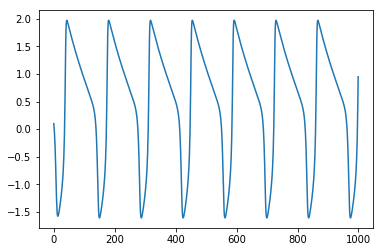

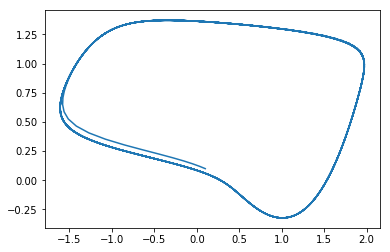

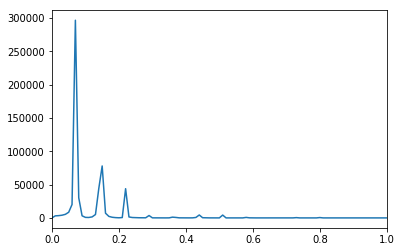

0.07


In [6]:
# Model Parameters

a = 0.75
b = 0.8
c = 3
i = -0.4
inits = [0.1, 0.1]
tfinal = 100
n = 1000

# Fitzhugh-Nagumo equations

def fitzhughnagumo_equation(state, t):
    v, w = tf.unstack(state)
    dv = c*(v + w - (v**3/3) + i)
    dw = -1/c * (v - a + b*w)
    return tf.stack([dv, dw])

# Tensorflow session

v, w = hp.generate_tensorflowsession(fitzhughnagumo_equation, inits, tfinal=tfinal, n=n)

# Membrane potential

hp.plotface(v)

# Phase plot

hp.plotface(v, w)

# Power Spectrum

freqs, ps, idx = hp.generate_powerspectrum(v, tfinal=tfinal, n=n)
hp.plotface(freqs[idx], ps[idx], xlim=[0,1])

# Frequency of max

print(hp.generate_maxfrequency(v, tfinal=tfinal, n=n))

#### Morris-Lecar  

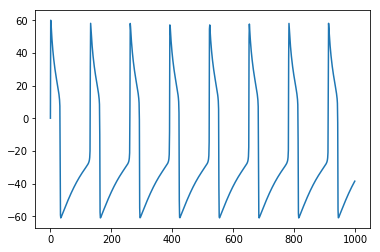

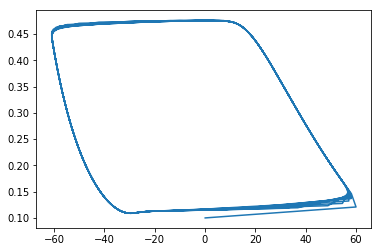

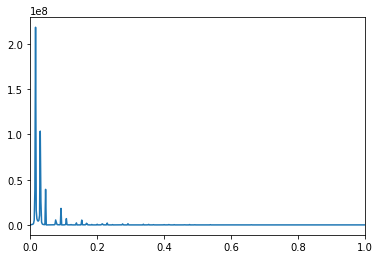

0.4


In [8]:
vk = -84
gk = 8
vca = 130
gca = 4.4
vl = -60
gl = 2
phi = 0.04
v1 = -1.2
v2 = 18
v3 = 2
v4 = 30
iapp = 80
inits = [0.1, 0.1]
tfinal = 500
num = 1000

def morrislecar_equation(state, t):
    v, n = tf.unstack(state)
    dv = (-gca*(0.5*(1 + tf.tanh((v - v1)/v2)))*(v - vca) - gk*n*(v - vk) - gl*(v - vl) + iapp)
    dn = (phi*((0.5*(1 + tf.tanh((v - v3)/v4))) - n))/(1/tf.cosh((v - v3)/(2*v4)))
    return tf.stack([dv, dn])

v, n = hp.generate_tensorflowsession(morrislecar_equation, inits, tfinal=tfinal, n=num)

hp.plotface(v)

hp.plotface(v, n)

freqs, ps, idx = hp.generate_powerspectrum(v, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(v, tfinal=tfinal, n=num))

#### Hindmarsh-Rose  

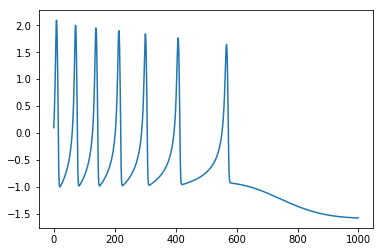

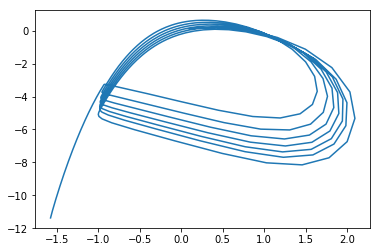

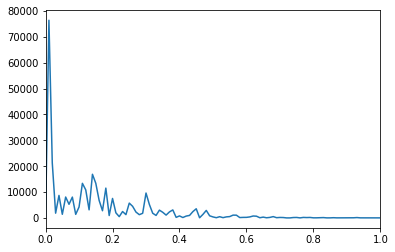

0.01


In [9]:
a = 1.0
b = 3.0
c = 1.0
d = 5.0
r = 0.006
s = 4.0
i = 1.3
xnot = -1.5
inits = [0.1, 0.1, 0.1]
tfinal = 100
num = 1000

def hindmarshrose_equation(state, t):
    x, y, z = tf.unstack(state)
    dx = y - a*(x**3) + (b*(x**2)) - z + i
    dy = c - d*(x**2) - y
    dz = r*(s*(x - xnot) - z)
    return tf.stack([dx, dy, dz])

x, y, z = hp.generate_tensorflowsession(hindmarshrose_equation, inits, tfinal=tfinal, n=num)

hp.plotface(x)

hp.plotface(x,y)

freqs, ps, idx = hp.generate_powerspectrum(x, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(x, tfinal=tfinal, n=num))

#### Hodgkin-Huxley  

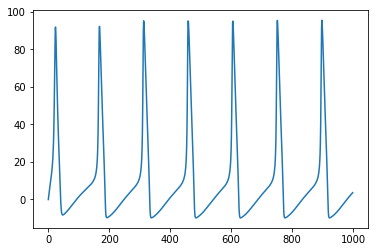

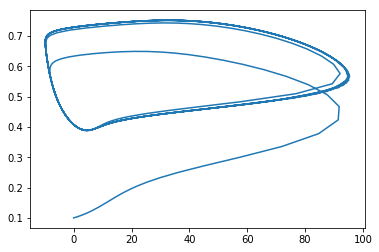

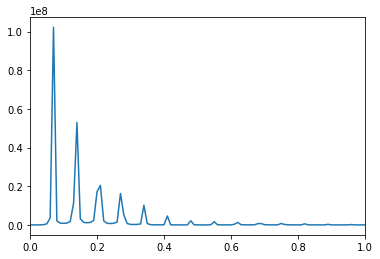

0.07


In [10]:
g_K = 36
g_Na = 120
g_L = 0.3
E_K = 12
E_Na = -115
E_L = -10.613
C_m = 1
I = -10
inits = [0.1, 0.1, 0.1, 0.1]
tfinal = 100
num = 1000

def hodgkinhuxley_equation(state, t):
    i, n, m, h = tf.unstack(state)
    # Alpha and beta functions for channel activation functions
    alpha_n = (0.01*(i + 10))/(tf.exp((i + 10)/10) - 1)
    beta_n = 0.125* tf.exp(i/80)
    alpha_m = (0.1*(i + 25))/(tf.exp((i + 25)/10) - 1)
    beta_m = 4*tf.exp(i/18)
    alpha_h = (0.07*tf.exp(i/20))
    beta_h = 1/(tf.exp((i + 30)/10) + 1)
    # Differential Equations
    di = (g_K*(n**4)*(i - E_K) + g_Na*(m**3)*h*(i - E_Na) + g_L*(i - E_L) - I)*(-1/C_m)
    dn = alpha_n*(1 - n) - beta_n*n
    dm = alpha_m*(1 - m) - beta_m*m
    dh = alpha_h*(1 - h) - beta_h*h
    return hp.tf.stack([di, dn, dm, dh])

i, n, m, h = hp.generate_tensorflowsession(hodgkinhuxley_equation, inits, tfinal=tfinal, n=num)

hp.plotface(-i)

hp.plotface(-i, n)

freqs, ps, idx = hp.generate_powerspectrum(-i, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(-i, tfinal=tfinal, n=num))